# Problem Statement:

#### Predicting insurance charges using the values like age, sex, bmi, children, smoker, region, charges etc. given in the dataset

Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

## Part - 1 Data Exploration and Pre-Processing

### 1 - Loading the given Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Vyas\1_Assignment\ML FT Projects\Linear Regression\P3_Insurance Dataset\Python_Linear_Regres.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### 2 - Finding the Null values

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 3 - Displaying through scatter plot between age and children

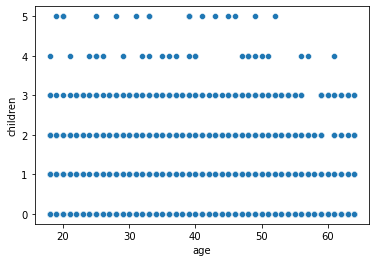

In [8]:
sns.scatterplot(x='age',y='children',data=df);

### 4 - Displaying bar plot between bmi and children

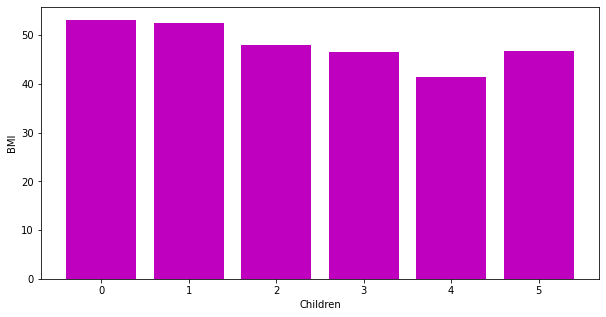

In [9]:
bmi = df.bmi
child = df.children
plt.figure(figsize=(10,5))
plt.bar(child,bmi,color='m')
plt.xlabel('Children')
plt.ylabel('BMI')
plt.show()

### 6 - Perform encoding to convert character data into numerical data

In [10]:
df = pd.get_dummies(df,drop_first=True)

In [11]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### 7 - Perform scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
n_df = scaler.fit_transform(df)
n_df = pd.DataFrame(n_df,columns=df.columns)
n_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.953689,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.728675,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.719843,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.776802,0.989591,-0.507463,1.765481,-0.611324,-0.566418


# Part-2: Working with Models

### 1 - Seperate Feature data from Target Data

Here our target is the price, so we need to seperate them by giving name X and y

In [13]:
X = n_df.drop('charges',axis = 1)
y = n_df[['charges']]

### 2 - Create a Linear regression model between Features and target data

In [14]:
X_train,X_test,y_train,y_test = tts (X,y,test_size=0.2,random_state=6)

In [15]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1182,-1.011557,-0.059613,-0.908614,-1.010519,-0.507463,-0.566418,-0.611324,1.765481
990,-0.940356,-1.782080,-0.078767,-1.010519,-0.507463,-0.566418,-0.611324,1.765481
123,0.341265,0.112633,-0.078767,0.989591,1.970587,-0.566418,-0.611324,-0.566418
184,0.341265,0.004364,0.751079,0.989591,-0.507463,-0.566418,1.635795,-0.566418
1167,-0.726752,-0.994667,0.751079,-1.010519,-0.507463,-0.566418,-0.611324,1.765481
...,...,...,...,...,...,...,...,...
335,1.765289,0.629374,-0.908614,0.989591,-0.507463,-0.566418,-0.611324,1.765481
618,-1.438764,0.401352,-0.908614,-1.010519,1.970587,-0.566418,1.635795,-0.566418
227,1.338082,1.844943,-0.908614,-1.010519,-0.507463,-0.566418,1.635795,-0.566418
713,-1.367563,1.608719,-0.908614,0.989591,-0.507463,-0.566418,-0.611324,-0.566418


In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train,y_train)

LinearRegression()

In [18]:
pred = model.predict(X_test)

### 3 - Displaying the test score and training score

In [19]:
model.score(X_train,y_train)

0.7438161151206177

In [20]:
model.score(X_test,y_test)

0.7772568430294238

### 4 - Extract slope and intercept value from the model

In [21]:
print("Slope of the Model is: ",model.coef_)
print("Intercept of the Model is: ",model.intercept_)

Slope of the Model is:  [[ 0.30984477  0.17352274  0.04761631 -0.00119545  0.78419135 -0.02102391
  -0.05013765 -0.03894886]]
Intercept of the Model is:  [0.00866386]


### 5 - Display Mean Squared Error

In [22]:
mse = mean_squared_error(y_test,pred)
print("Mean Squared Error of the Model is: ",mse)

Mean Squared Error of the Model is:  0.22056624386362


### 6 - Display Mean Absolute Error

In [23]:
mae = mean_absolute_error(y_test,pred)
print("Mean Absolute Error of the Model is: ",mae)

Mean Absolute Error of the Model is:  0.3366198444273029


### 7 - Root Mean Squared Error

In [24]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error of the Model is: ",rmse)

Root Mean Squared Error of the Model is:  0.4696448060647749


### 8 - R2 Score

In [25]:
r2 = r2_score(y_test,pred)
print("R2 Score of the Model is: ", r2)

R2 Score of the Model is:  0.7772568430294238
